In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/day-6-dataset/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,4.466000,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,3.363387,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,7.000000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,7.000000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,7.000000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [ ]:
data.CustomerId

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [ ]:
# check for missing value
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
data['CreditScore'].fillna(data['CreditScore'].median(),inplace = True)



In [ ]:
data['CreditScore'].fillna("Germany",inplace = True)

In [ ]:
# dealing with outliers
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


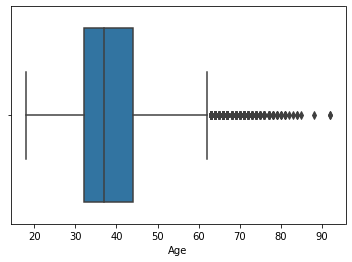

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
# upper exterme = q3+1.5*IQR
# lower exterme = q2+1.5*IQR
# IQR = q3-q2
qnt = data.quantile(q = [0.31,0.45])

In [ ]:
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.31,3100.69,15643514.63,601.0,33.0,3.0,0.000,1.0,1.0,0.0,62685.4438,0.0
0.45,4500.55,15678399.85,639.0,36.0,5.0,87621.897,1.0,1.0,0.0,90057.2580,0.0


In [ ]:
IQR = qnt.loc[0.45] - qnt.loc[0.31]

In [ ]:
IQR

RowNumber           1399.8600
CustomerId         34885.2200
CreditScore           38.0000
Age                    3.0000
Tenure                 2.0000
Balance            87621.8970
NumOfProducts          0.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    27371.8142
Exited                 0.0000
dtype: float64

In [ ]:
upper_exterme =  qnt.loc[0.45]+1.5*IQR

In [ ]:
upper_exterme

RowNumber          6.600340e+03
CustomerId         1.573073e+07
CreditScore        6.960000e+02
Age                4.050000e+01
Tenure             8.000000e+00
Balance            2.190547e+05
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     0.000000e+00
EstimatedSalary    1.311150e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
lower_exterme =  qnt.loc[0.31]+1.5*IQR

In [ ]:
lower_exterme

RowNumber          5.200480e+03
CustomerId         1.569584e+07
CreditScore        6.580000e+02
Age                3.750000e+01
Tenure             6.000000e+00
Balance            1.314328e+05
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     0.000000e+00
EstimatedSalary    1.037432e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
data[data['Tenure']>20]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['CreditScore']>1000]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['Tenure']<50]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data[data['CreditScore']<2000]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
  # replacing outlier with mean

data['Balance'] = np.where(data['Balance']>90000,data['Balance'].mean(),data['Balance'])

In [ ]:
data[data['Balance']>90000]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
# Encoding

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,76485.889288,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,76485.889288,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,76485.889288,1,1,1,79084.10,0


In [ ]:
# method - dummies
pd.get_dummies(data,columns = ['Balance'])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,...,EstimatedSalary,Exited,Balance_0.0,Balance_3768.69,Balance_12459.19,Balance_14262.8,Balance_16893.59,Balance_23503.31,Balance_24043.45,Balance_76485.889288
0,1,15634602,Hargrave,619,France,Female,42,2,1,1,...,101348.88,1,1,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,1,0,...,112542.58,0,0,0,0,0,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,3,1,...,113931.57,1,0,0,0,0,0,0,0,1
3,4,15701354,Boni,699,France,Female,39,1,2,0,...,93826.63,0,1,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,1,1,...,79084.10,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,2,1,...,96270.64,0,1,0,0,0,0,0,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,1,1,...,101699.77,0,0,0,0,0,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,1,0,...,42085.58,1,1,0,0,0,0,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,2,1,...,92888.52,1,0,0,0,0,0,0,0,1


In [ ]:
 # Encoding
 from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data['Balance'] = le.fit_transform(data['Balance'])

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,7,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,7,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,7,1,1,1,79084.10,0


In [ ]:
   # separting dependent and independent columns
   
   y = data['EstimatedSalary']
   x = data.drop(columns = ['EstimatedSalary'],axis = 1)


In [ ]:
 names = x.columns

In [ ]:
names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 10)

In [ ]:
x_train.shape

(9990, 5)

In [ ]:
x_test.shape

(10, 5)

In [ ]:
x = pd.DataFrame(X,columns= names)

In [ ]:
x.head

<bound method NDFrame.head of      RowNumber CustomerId    Surname CreditScore Geography  Gender Age Tenure  \
0            0   15634602   Hargrave         619    France  Female  42      2   
1            1   15647311       Hill         608     Spain  Female  41      1   
2            2   15619304       Onio         502    France  Female  42      8   
3            3   15701354       Boni         699    France  Female  39      1   
4            4   15737888   Mitchell         850     Spain  Female  43      2   
...        ...        ...        ...         ...       ...     ...  ..    ...   
9995      9995   15606229   Obijiaku         771    France    Male  39      5   
9996      9996   15569892  Johnstone         516    France    Male  35     10   
9997      9997   15584532        Liu         709    France  Female  36      7   
9998      9998   15682355  Sabbatini         772   Germany    Male  42      3   
9999      9999   15628319     Walker         792    France  Female  28      4  